In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pyrealsense2 as rs

# Open the video file
cap = cv2.VideoCapture('CamIntelRealSense_00/rgb.mp4')

# Initialize a list to hold the frames
rgb_data = []
lost_frames = 0

# Read the frames one by one
while(cap.isOpened()):
    ret, frame = cap.read()

    # If a frame was successfully read
    if ret == True:
        # Convert the frame from BGR (OpenCV's default color order) to RGB, and append it to the list
        rgb_data.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    else:
        lost_frames += 1
        print(frame)
        break

# Release the video file
cap.release()

# Convert the list of frames to a numpy array
rgb_data = np.array(rgb_data)




None


In [2]:

depth_data = np.load('CamIntelRealSense_00/depth.npy')
with open('Labels_00/label.json') as f:
    labels = json.load(f)

Shape of rgb data:  (2370, 480, 848, 3)
Shape of depth data:  (2370, 480, 848)
Data type:  uint16
Minimum depth value:  0
Maximum depth value:  65535
Average depth value:  3866.655718357955
Lost frames:  1


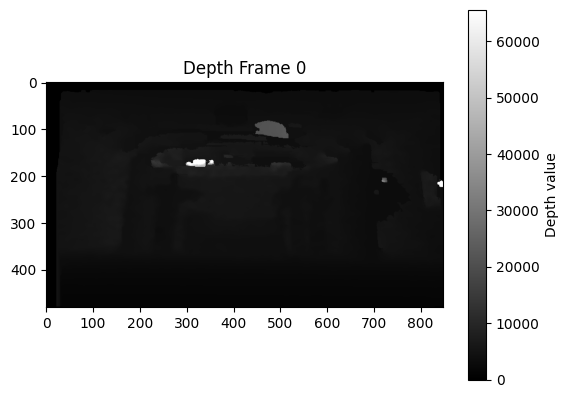

In [3]:
print("Shape of rgb data: ", rgb_data.shape)
print("Shape of depth data: ", depth_data.shape)
print("Data type: ", depth_data.dtype)
print("Minimum depth value: ", np.min(depth_data))
print("Maximum depth value: ", np.max(depth_data))
print("Average depth value: ", np.mean(depth_data))
print("Lost frames: ", lost_frames)


plt.imshow(depth_data[0], cmap='gray')
plt.colorbar(label='Depth value')
plt.title("Depth Frame 0")
plt.show()


In [14]:
#print("Labeled frames: ", labels[7943])
#print("Labeled frames: ", labels[11692])
print(len(rgb_data))

344


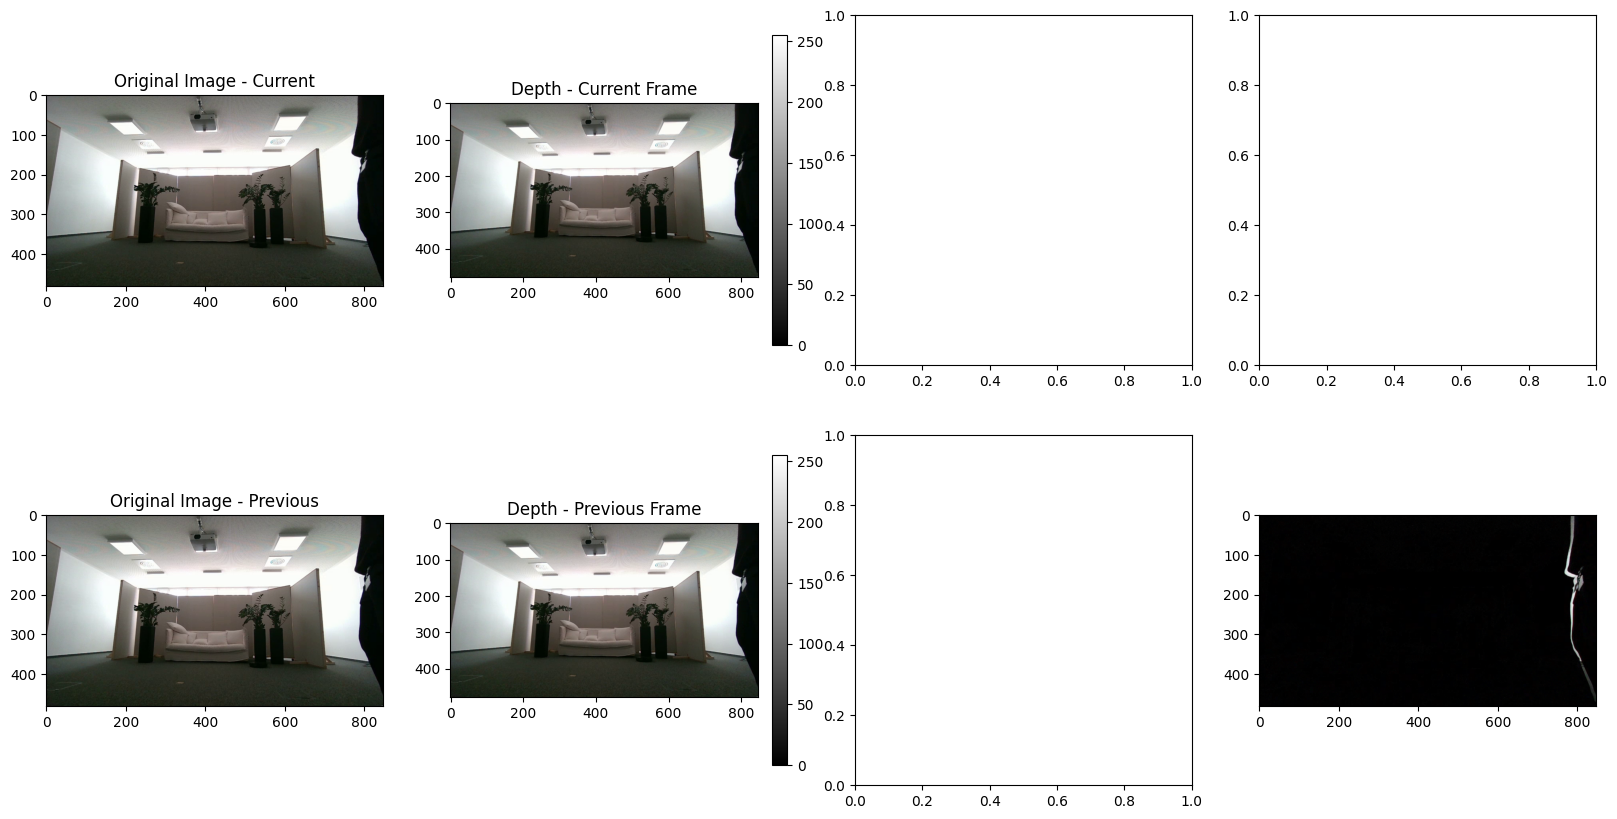

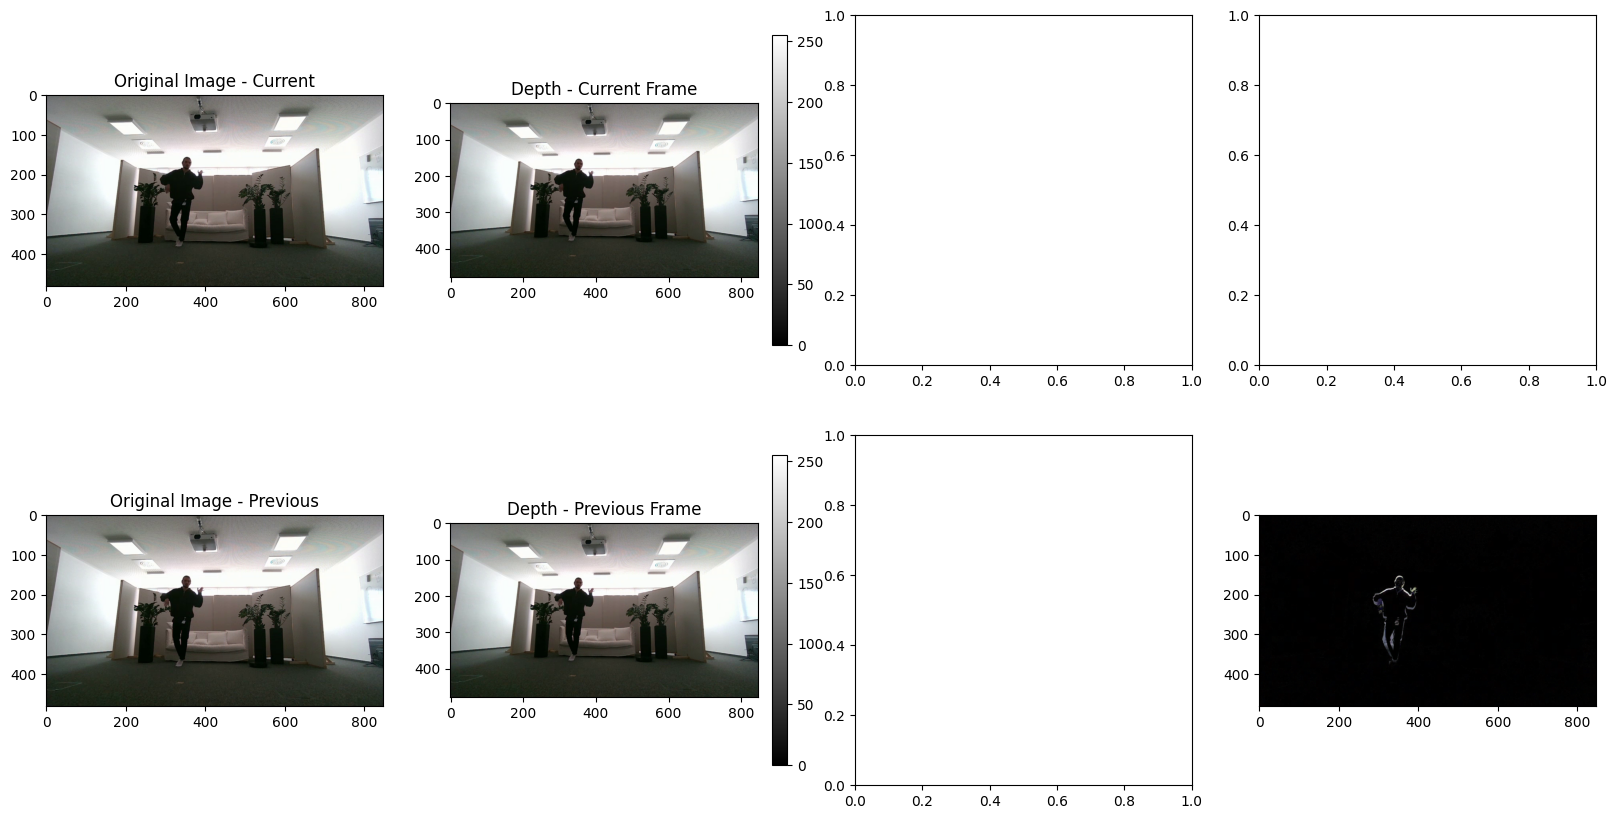

In [9]:
import matplotlib as m
import matplotlib.cbook as cbook
import matplotlib.colors as colors

# Initialize the data structures to hold the masks
current_frame_masks = []
previous_frame_masks = []
difference_masks = []

# Loop over the frames
a = [15, 75, 150, 225]
# for i in range(1, len(depth_data)):
for i in a:
    # Check if the current frame has a person detected
    if labels[i]:
        # Extract the bounding box
        bbox = labels[i][0]['bbox']
        x, y, x1, y1 = map(int, bbox)

        # Extract the pixels within the bounding box for the current and previous frames
        # current_frame_mask = depth_data[i, y:y1, x:x1]
        # previous_frame_mask = depth_data[i-1, y:y1, x:x1]
        #print(i)
        #print(int(i))
        current_frame_mask = rgb_data[i,:,:]
        previous_frame_mask = rgb_data[i-1,:,:]
        #print(current_frame_mask[200, 720])

        # Compute the difference mask
        difference_mask = np.abs(current_frame_mask - previous_frame_mask)

        # Append the masks to the relevant lists
        current_frame_masks.append(current_frame_mask)
        previous_frame_masks.append(previous_frame_mask)
        difference_masks.append(difference_mask)

        # Visualization
        fig, ax = plt.subplots(2, 4, figsize=(20, 10))
        #divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=3500, vmax=7000)


        # Original image - Current
        # ax[0,0].imshow(rgb_data[i, y:y1, x:x1])
        ax[0,0].imshow(rgb_data[i, :, :])
        ax[0,0].set_title("Original Image - Current")

        # Depth - Current frame
        img1 = ax[0,1].imshow(current_frame_mask, cmap='gist_gray') #  norm=divnorm
        ax[0,1].set_title("Depth - Current Frame")
        fig.colorbar(img1, ax=ax[0,1], fraction=0.046, pad=0.04)

        # Original image - Previous
        # ax[1,0].imshow(rgb_data[i-1, y:y1, x:x1])
        ax[1,0].imshow(rgb_data[i-1, :, :])
        ax[1,0].set_title("Original Image - Previous")

        # Depth - Previous frame
        img2 = ax[1,1].imshow(previous_frame_mask, cmap='gist_gray') #  norm=divnorm
        ax[1,1].set_title("Depth - Previous Frame")
        fig.colorbar(img2, ax=ax[1,1], fraction=0.046, pad=0.04)

        frame1 = previous_frame_mask
        frame2 = current_frame_mask

        # Compute the difference between the current frame and the previous frame
        diff = cv2.absdiff(frame1, frame2)

        # Show the difference
        plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
        plt.show()

        # Difference
        img3 = ax[0,2].imshow(difference_mask, cmap='gist_gray')
        ax[0,2].set_title("RGB Difference")
        fig.colorbar(img3, ax=ax[0,2], fraction=0.046, pad=0.04)

        # Empty plot for alignment
        ax[1,2].axis('off')

        # Empty plots for alignment
        ax[0,3].axis('off')
        ax[1,3].axis('off')

        plt.show()
        #plt.savefig()

# Convert the lists to Pandas DataFrames
# current_frame_masks = pd.DataFrame(current_frame_masks)
# previous_frame_masks = pd.DataFrame(previous_frame_masks)
# difference_masks = pd.DataFrame(difference_masks)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import numpy as np

n = [ 9000, 9010,9020,9030,9040,9050,9060,9085, 9120, 9130]

for i in n:
    # Plot the depth frame
    divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=3500, vmax=7000)
    plt.imshow(depth_data[i], cmap='gray', norm=divnorm)
    plt.colorbar(label='Depth value')
    plt.title(f"Depth Frame {i}")
    plt.show()



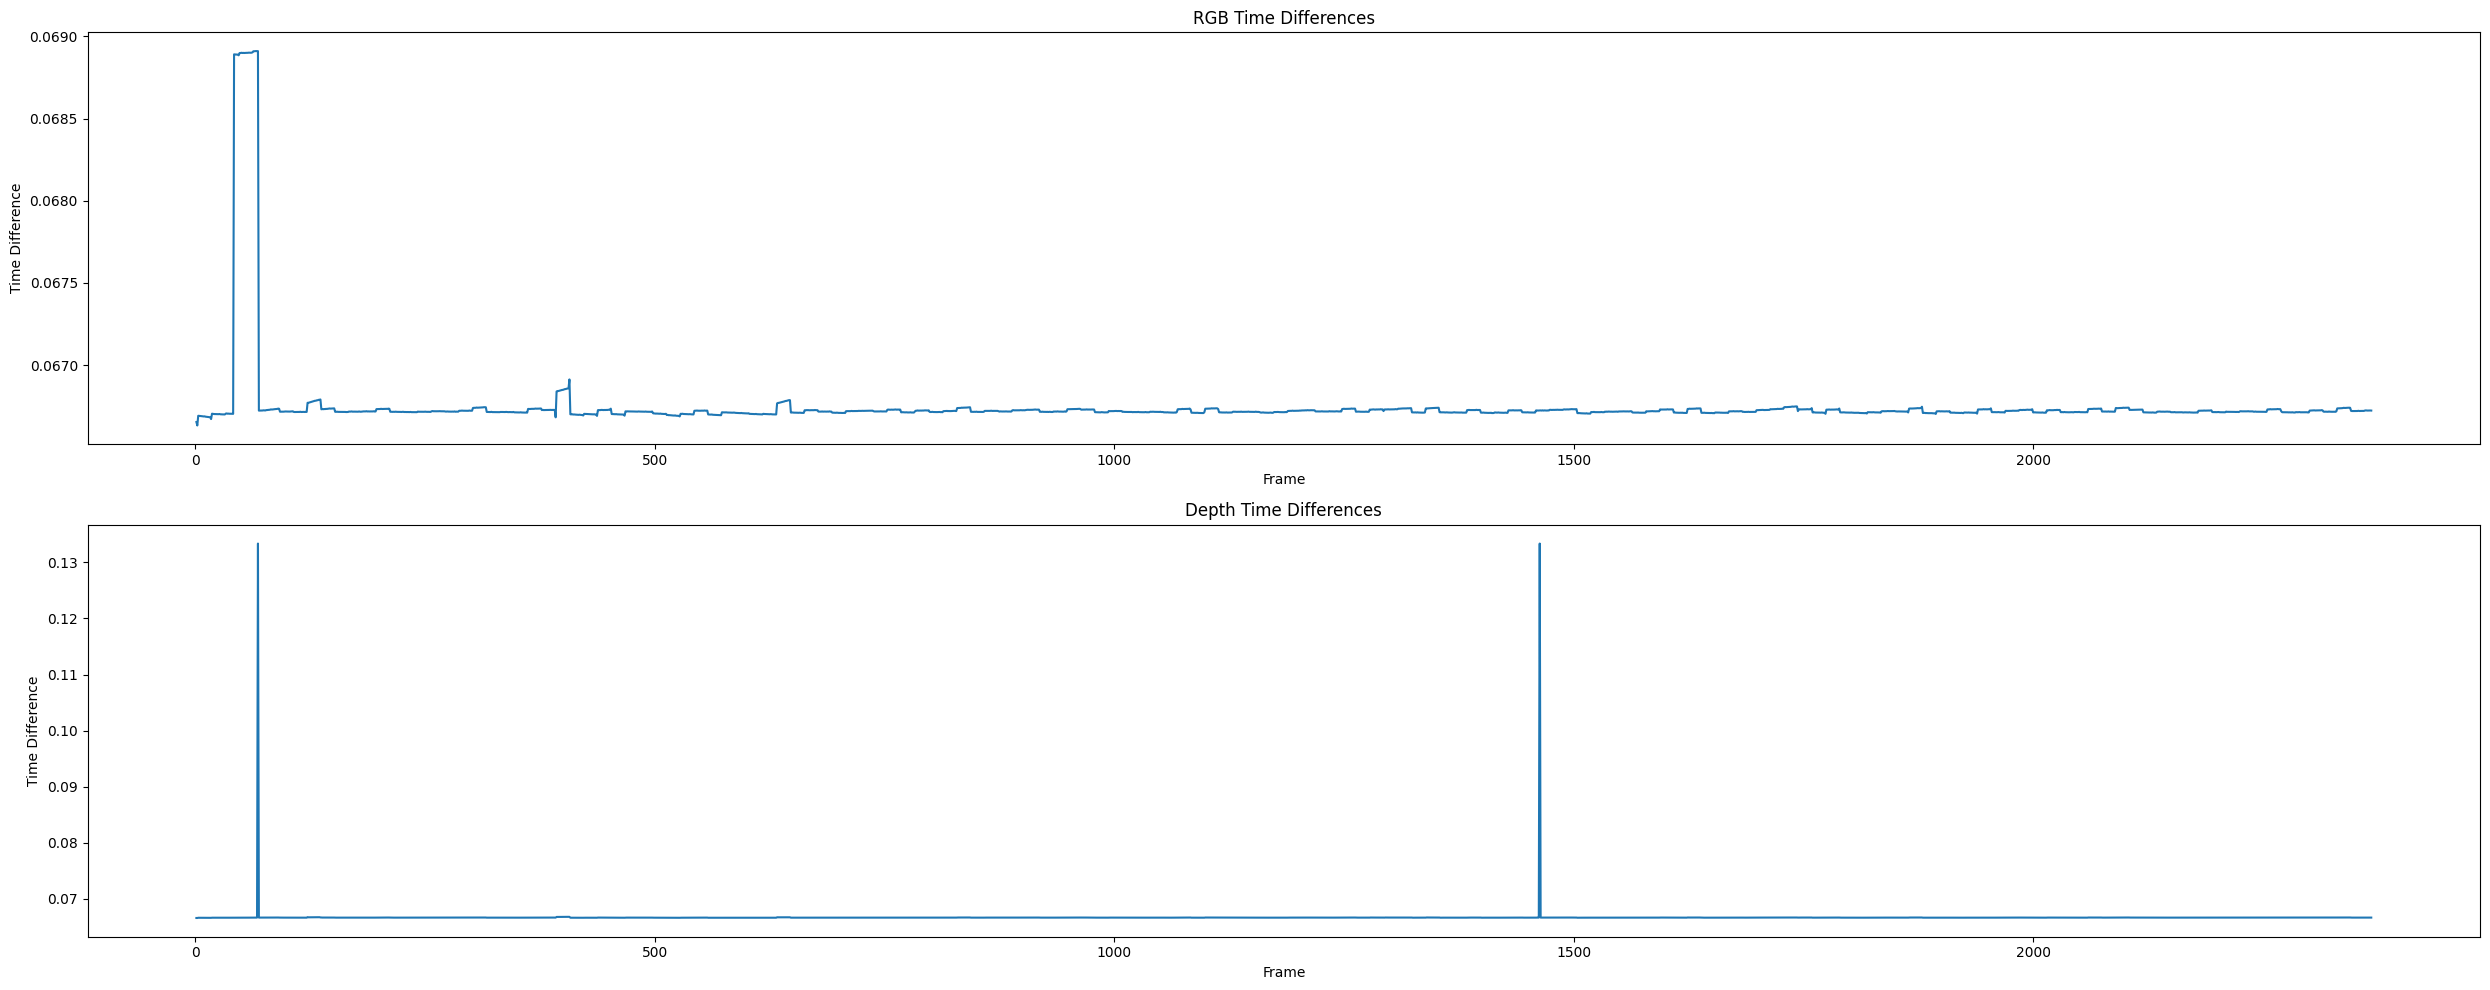

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the timestamp data
rgb_timestamps = pd.read_csv(r'C:\Users\Ibragimov\Desktop\Projects\recording_2024_03_27_14_21_26\CamIntelRealSense_00\rgb_timestamp.csv')
depth_timestamps = pd.read_csv(r'C:\Users\Ibragimov\Desktop\Projects\recording_2024_03_27_14_21_26\CamIntelRealSense_00\depth_timestamp.csv')

# Calculate the differences in time between consecutive frames
rgb_diff = rgb_timestamps.diff()
depth_diff = depth_timestamps.diff()

# Create a new figure
plt.figure(figsize=(25, 10))

# Plot the differences for the RGB recording
plt.subplot(2, 1, 1)
plt.plot(rgb_diff, label='RGB')
plt.title('RGB Time Differences')
plt.xlabel('Frame')
plt.ylabel('Time Difference')

# Plot the differences for the Depth recording
plt.subplot(2, 1, 2)
plt.plot(depth_diff, label='Depth')
plt.title('Depth Time Differences')
plt.xlabel('Frame')
plt.ylabel('Time Difference')

# Show the figure
plt.tight_layout()
plt.show()


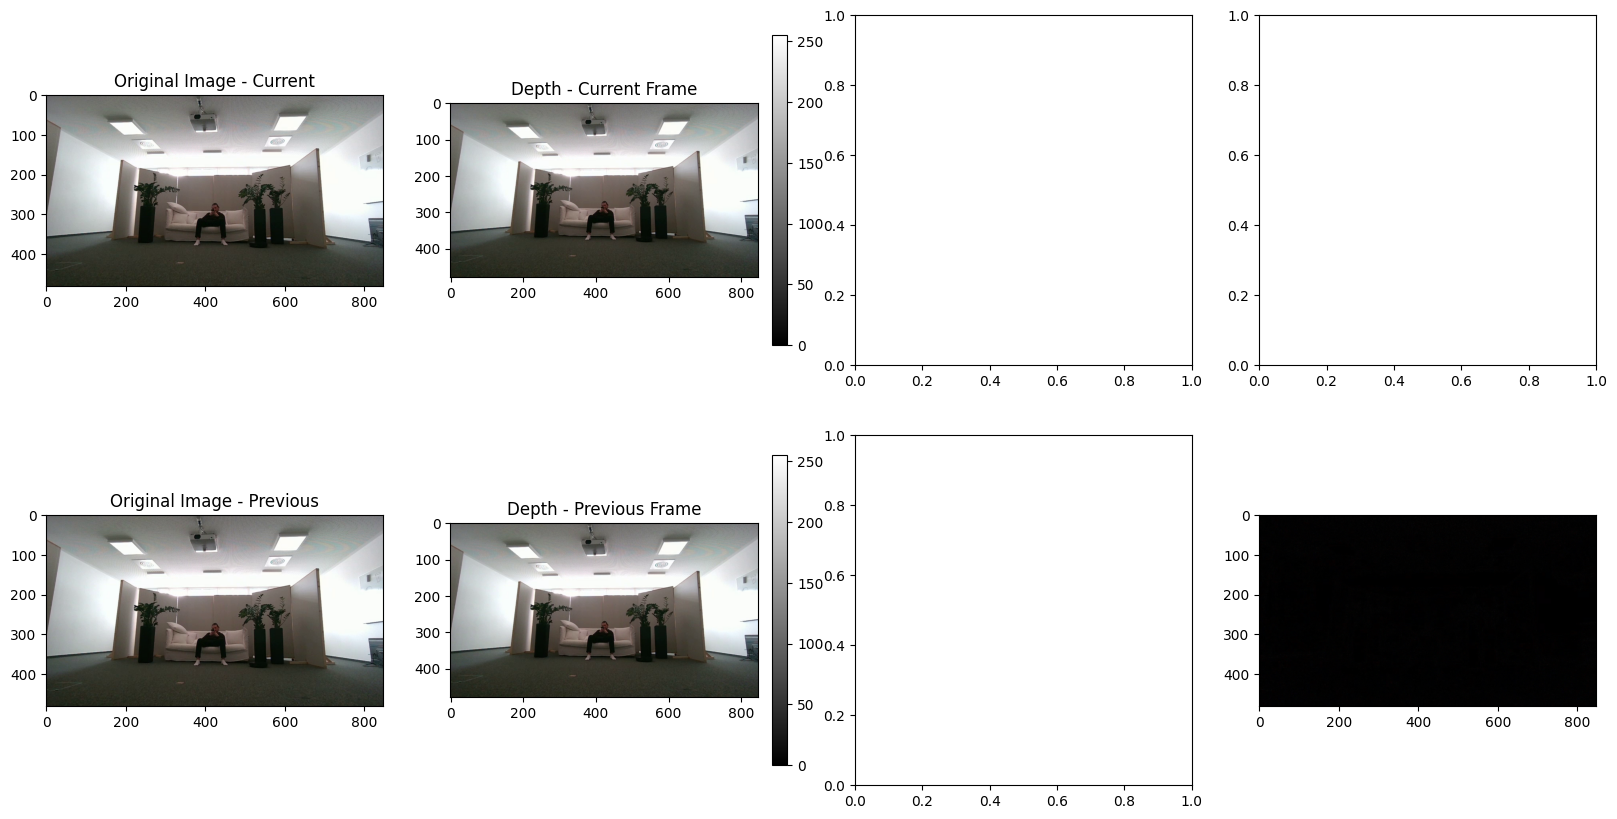

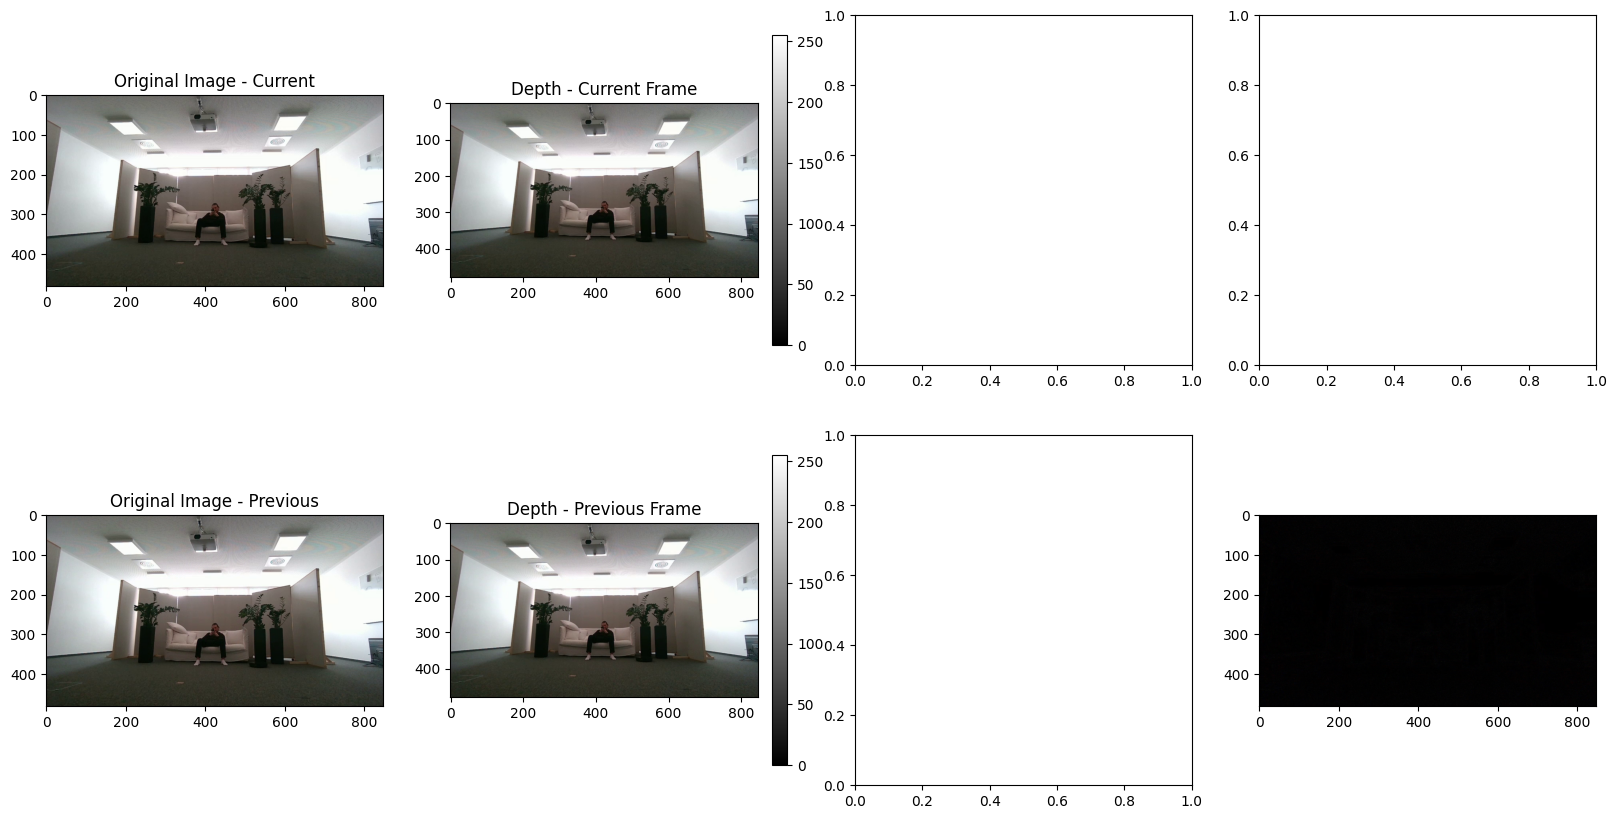

In [7]:
import matplotlib as m
import matplotlib.cbook as cbook
import matplotlib.colors as colors

# Initialize the data structures to hold the masks
current_frame_masks = []
previous_frame_masks = []
difference_masks = []

# Loop over the frames
a = [5, 30, 90, 120]
# for i in range(1, len(depth_data)):
for i in a:
    # Check if the current frame has a person detected
    if labels[i]:
        # Extract the bounding box
        bbox = labels[i][0]['bbox']
        x, y, x1, y1 = map(int, bbox)

        # Extract the pixels within the bounding box for the current and previous frames
        # current_frame_mask = depth_data[i, y:y1, x:x1]
        # previous_frame_mask = depth_data[i-1, y:y1, x:x1]
        #print(i)
        #print(int(i))
        current_frame_mask = rgb_data[i,:,:]
        previous_frame_mask = rgb_data[i-1,:,:]
        #print(current_frame_mask[200, 720])

        # Compute the difference mask
        difference_mask = np.abs(current_frame_mask - previous_frame_mask)

        # Append the masks to the relevant lists
        current_frame_masks.append(current_frame_mask)
        previous_frame_masks.append(previous_frame_mask)
        difference_masks.append(difference_mask)

        # Visualization
        fig, ax = plt.subplots(2, 4, figsize=(20, 10))
        #divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=3500, vmax=7000)


        # Original image - Current
        # ax[0,0].imshow(rgb_data[i, y:y1, x:x1])
        ax[0,0].imshow(rgb_data[i, :, :])
        ax[0,0].set_title("Original Image - Current")

        # Depth - Current frame
        img1 = ax[0,1].imshow(current_frame_mask, cmap='gist_gray') #  norm=divnorm
        ax[0,1].set_title("Depth - Current Frame")
        fig.colorbar(img1, ax=ax[0,1], fraction=0.046, pad=0.04)

        # Original image - Previous
        # ax[1,0].imshow(rgb_data[i-1, y:y1, x:x1])
        ax[1,0].imshow(rgb_data[i-1, :, :])
        ax[1,0].set_title("Original Image - Previous")

        # Depth - Previous frame
        img2 = ax[1,1].imshow(previous_frame_mask, cmap='gist_gray') #  norm=divnorm
        ax[1,1].set_title("Depth - Previous Frame")
        fig.colorbar(img2, ax=ax[1,1], fraction=0.046, pad=0.04)

        frame1 = previous_frame_mask
        frame2 = current_frame_mask

        # Compute the difference between the current frame and the previous frame
        diff = cv2.absdiff(frame1, frame2)

        # Show the difference
        plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
        plt.show()

        # Difference
        img3 = ax[0,2].imshow(difference_mask, cmap='gist_gray')
        ax[0,2].set_title("RGB Difference")
        fig.colorbar(img3, ax=ax[0,2], fraction=0.046, pad=0.04)

        # Empty plot for alignment
        ax[1,2].axis('off')

        # Empty plots for alignment
        ax[0,3].axis('off')
        ax[1,3].axis('off')

        plt.show()
        #plt.savefig()

# Convert the lists to Pandas DataFrames
# current_frame_masks = pd.DataFrame(current_frame_masks)
# previous_frame_masks = pd.DataFrame(previous_frame_masks)
# difference_masks = pd.DataFrame(difference_masks)

Principal Point (ppx, ppy): (427.03558349609375, 243.14137268066406)
Focal Length (fx, fy): (432.8127746582031, 432.8127746582031)
Image Size (width, height): (848, 480)
1026235
1645625


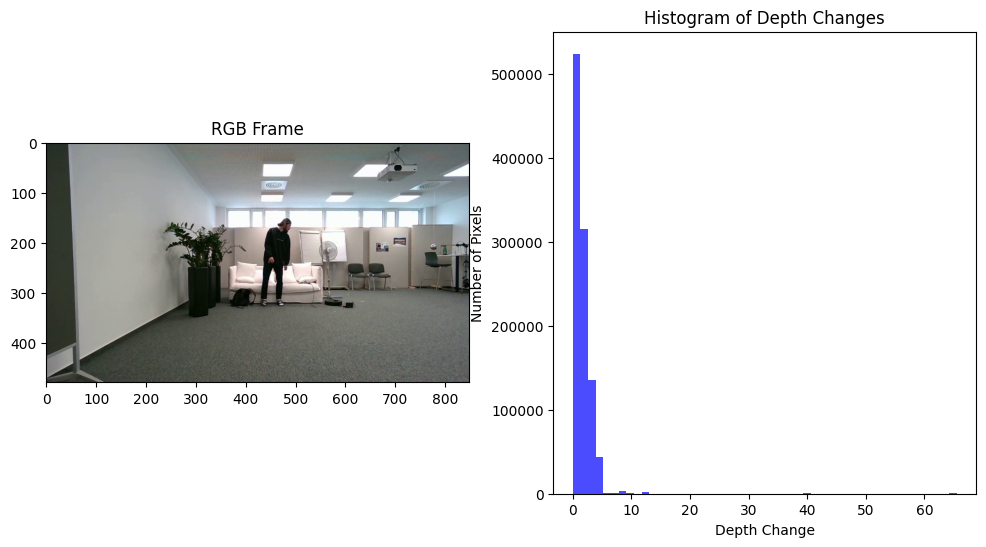

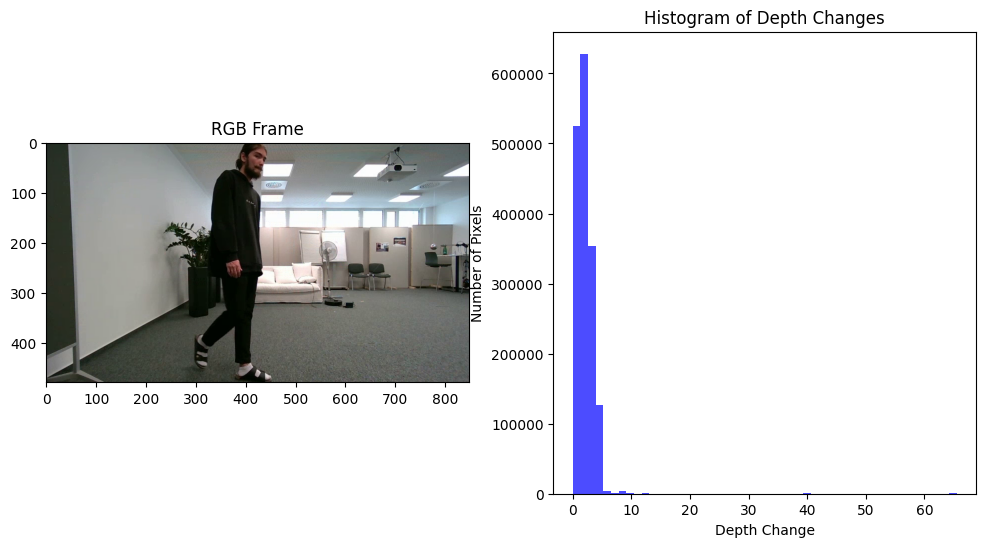

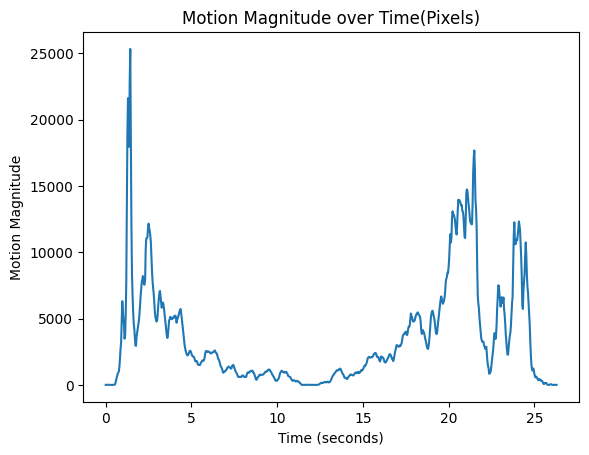

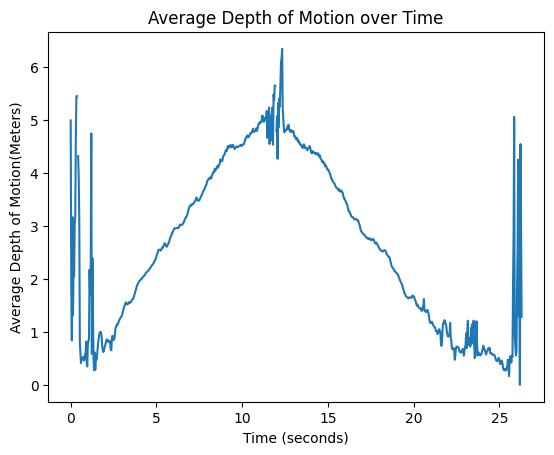

In [16]:
pip install numpy
pip install matplotlib
pip install cv2

pip install pyrealsense2

In [ ]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import TYPE_CHECKING, Dict, List, Tuple
import pyrealsense2 as rs

def _calculated_world_position(
    depth: np.ndarray, intrinsics: rs.intrinsics, point: Tuple[float, float]
) -> Tuple[float, float, float]:
    if 0 <= point[0] < depth.shape[1] and 0 <= point[1] < depth.shape[0]:
        point_3d_camera = rs.rs2_deproject_pixel_to_point(
            intrin=intrinsics, pixel=point, depth=depth[int(point[1]), int(point[0])]
        )
        return point_3d_camera[2] / 1000, -point_3d_camera[0] / 1000, -point_3d_camera[1] / 1000
    return np.nan, np.nan, np.nan

# Load the video
cap = cv2.VideoCapture('CamIntelRealSense_00/rgb.mp4')
video_path = 'CamIntelRealSense_00/rgb.mp4'

# Load the depth maps
depth_maps = np.load('CamIntelRealSense_00/depth.npy')


# Define the intrinsic camera parameters. Fill in your correct values here
intrinsics_predefined = rs.intrinsics()
intrinsics_predefined.ppx = 320.0  # principal point x
intrinsics_predefined.ppy = 240.0  # principal point y
intrinsics_predefined.fx = 385.5   # focal length x
intrinsics_predefined.fy = 385.5   # focal length y
intrinsics_predefined.width = 640  # image width
intrinsics_predefined.height = 480 # image height

# Create a pipeline
pipeline = rs.pipeline()
# Create a config object
config = rs.config()

# Flag to decide whether to use new camera intrinsics or predefined values
use_new_intrinsics = False  # Set this to False if you want to use predefined intrinsics

if use_new_intrinsics:
    # Start the pipeline
    profile = pipeline.start(config)

    # Get the first frame to get the sensor profile
    frames = pipeline.wait_for_frames()
    depth_frame = frames.get_depth_frame()
    depth_profile = depth_frame.get_profile()
    intrinsics = depth_profile.as_video_stream_profile().get_intrinsics()

    # Stop the pipeline
    pipeline.stop()
else:
    intrinsics = intrinsics_predefined


fps = cap.get(cv2.CAP_PROP_FPS)  # Get the frames per second

if not cap.isOpened():
    raise Exception(f"Could not open video file {video_path}")

# Initialize the first frame
ret, frame1 = cap.read()

if not ret or frame1 is None:
    raise Exception(f"Could not read frame from video file {video_path}")


# Initialize the video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or use 'XVID'
out = cv2.VideoWriter('output.mp4', fourcc, fps, (frame1.shape[1], frame1.shape[0]))

# To store motion magnitude, time and average depth
motion_magnitudes = []
timestamps = []
average_depths = []

frame_count = 0

depth_range_min, depth_range_max = 0, 8  # Desired minimum/maximum depth (in meters)
hist_threshold = 3
micromotion_threshold = 30
bins = 128

# Load the labels.json file
with open('Labels_00/label.json', 'r') as f:
    labels_data = json.load(f)

while True:
    # Get the next frame
    ret, frame2 = cap.read()

    if not ret:
        break

    # Compute the difference between the current frame and the previous frame
    diff = cv2.absdiff(frame1, frame2)

    # Write the difference frame to the new video file
    out.write(diff)

    # Convert the difference image to grayscale
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to the grayscale image
    _, thresholded = cv2.threshold(gray, 25, 255, cv2.THRESH_BINARY)
    depths = []

    # Check if a corresponding depth map exists
    if frame_count < len(depth_maps):
        # Get the corresponding depth map
        depth_map = depth_maps[frame_count]

        # Compute the average depth of the pixels where motion was detected
        motion_pixels = np.nonzero(thresholded)


        for pixel in zip(motion_pixels[1], motion_pixels[0]):
            depth = _calculated_world_position(depth_map, intrinsics, pixel)[0]
            if not np.isnan(depth) and depth_range_min <= depth <= depth_range_max:
                depths.append(depth)

        if depths:
            avg_depth = np.mean(depths)
        else:
            avg_depth = np.nan  # No motion detected in this frame

        average_depths.append(avg_depth)

    # Count the number of white pixels in the thresholded image
    motion_magnitude = np.count_nonzero(thresholded)
    motion_magnitudes.append(motion_magnitude)

    # Compute the timestamp and append it to the list
    timestamp = frame_count / fps
    timestamps.append(timestamp)

    #if frame_count % 180 == 0 or frame_count == 1650:
    # Display the RGB frame, difference image, and the histogram
    plt.figure(figsize=(18, 6))

    # Generate histogram data
    hist, bin_edges = np.histogram(depths, bins=bins, range=(depth_range_min, depth_range_max))

    # Apply frequency threshold
    hist[hist < hist_threshold] = 0

    # Create a list of symbols based on the histogram frequencies
    motion_symbols = ""
    for value in hist:
        if value == 0:
            motion_symbols += '-'
        elif 3 <= value <= micromotion_threshold:
            motion_symbols += 'x'
        else:
            motion_symbols += '+'

    # Check if labels_data[frame_count] is a dictionary
    if labels_data[frame_count]:
        labels_data[frame_count][0]['motion'] = motion_symbols
    else:
        labels_data[frame_count] = [{'motion': motion_symbols}]

    # plt.subplot(1, 3, 1)
    # plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
    # plt.title(f"RGB Frame, ({frame_count/30} second) ")

    # plt.subplot(1, 3, 2)
    # plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
    # plt.title("Difference Image")

    # # Plot histogram
    # plt.subplot(1, 3, 3)
    # plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color='blue', alpha=0.7)
    # plt.title("Histogram of Depth Values")
    # plt.xlabel("Depth Value")
    # plt.ylabel("Number of Pixels")

    # plt.tight_layout()
    # plt.show()

    # Update the first frame and frame count
    frame1 = frame2
    frame_count += 1

# Write the updated labels_data back to the labels.json file
with open('Labels_00/labels.json', 'w') as f:
    # Write each frame's data to the file, followed by a newline
    for frame_data in labels_data:
        json.dump(frame_data, f)
        f.write('\n')

# Release the video capture and writer
cap.release()
out.release()

# Plot the graph of video time vs motion magnitude vs average depth
plt.figure()
plt.plot(timestamps, motion_magnitudes)
plt.xlabel('Time (seconds)')
plt.ylabel('Motion Magnitude')
plt.title('Motion Magnitude over Time')
plt.figure()
plt.plot(timestamps, average_depths)
plt.xlabel('Time (seconds)')
plt.ylabel('Average Depth of Motion')
plt.title('Average Depth of Motion over Time')
plt.show()

In [6]:
print(np.shape(motion_magnitudes))

print(motion_magnitudes[0:100])

(1876,)
[2, 0, 7, 0, 6, 3, 3, 7, 6, 7, 7, 3, 5, 8, 3, 4, 5, 4, 9, 7, 4, 8, 6, 6, 3, 5, 4, 4, 4, 8, 6, 4, 3, 2, 3, 2, 3, 8, 2, 6, 8, 5, 7, 6, 6, 8, 5, 9, 3, 5, 1, 4, 1, 6, 5, 4, 7, 7, 7, 7, 4, 3, 4, 3, 6, 3, 6, 5, 6, 10, 4, 6, 4, 6, 5, 4, 2, 2, 8, 6, 3, 9, 7, 4, 2, 3, 5, 2, 5, 2, 4, 4, 4, 4, 5, 6, 4, 5, 7, 6]


In [7]:
print(np.shape(average_depths))
print(len(average_depths))
print("0,1 sec: ",average_depths[0:30]), print()
print("90,91 sec: ",average_depths[1350:1380]), print()
print("145-152 sec: ",average_depths[2175:2295]), print()

(2369,)
2369
0,1 sec:  [5408.5, 5408.0, nan, 5386.0, nan, 5343.0, nan, 4111.0, nan, 5283.0, 5313.0, 4954.0, 4111.0, nan, nan, nan, nan, nan, nan, nan, 4777.5, nan, 5408.0, nan, 5249.5, 5430.5, 4759.5, 5386.0, 4412.0, 4124.0]

90,91 sec:  [3482.8888888888887, 3584.2702702702704, 3698.8, 3672.0087719298244, 3899.9285714285716, 3879.5, 4018.8, 3546.875, 3668.6585365853657, 3686.1923076923076, 3706.084210526316, 3694.8968253968255, 3956.470588235294, 4137.0, 3923.5, 4730.0, 4747.0, 3565.561403508772, 3679.741176470588, 3640.3333333333335, 3510.5882352941176, 3602.7118644067796, 3672.4126984126983, 3648.35, 3537.848484848485, 3623.9754098360654, 3656.2105263157896, 3498.25, 3627.8602150537636, 3634.126213592233]

145-152 sec:  [4730.0, nan, 5155.0, nan, 4042.2631578947367, 4169.240310077519, 4143.901960784314, 4099.182825484764, 4141.114285714286, 4231.261306532663, 4279.789115646258, 4285.30291970803, 4328.719402985074, 4295.0338294993235, 4296.051420838971, 4303.9682539682535, 4244.514745

(None, None)